In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/global_data/master_df_clean.csv')

In [4]:
df.head()

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.28148,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
1,1961,BLZ,Belize,Central America,Americas,1.0,275.0,25.318518,199.05833,42.0,2297.0,0.018285,Medium,94.703,566.0
2,1961,CAN,Canada,Northern America,Americas,1.0,0.0,-7.946412,34.59439,36695.0,987975.0,0.037142,Medium,18233.964,NaN
3,1961,ETH,Ethiopia,Eastern Africa,Africa,1.0,30.0,22.493770,68.36165,11486.0,122190.0,0.094001,Medium,22671.191,NaN
4,1961,FRA,France,Western Europe,Europe,1.0,21.0,11.384623,65.22725,21405.0,54908.6,0.389830,Medium,46266.981,89171.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306 entries, 0 to 14305
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       14306 non-null  int64  
 1   iso                        14306 non-null  object 
 2   country_or_area            14306 non-null  object 
 3   region                     5108 non-null   object 
 4   continent                  5108 non-null   object 
 5   number_of_disasters        14306 non-null  float64
 6   total_human_affected       14306 non-null  float64
 7   temperature                12262 non-null  float64
 8   precipitation              12262 non-null  float64
 9   cropland                   12293 non-null  float64
 10  country_area               12293 non-null  float64
 11  cropland_pct               12293 non-null  float64
 12  variant                    12567 non-null  object 
 13  population                 12567 non-null  flo

In [6]:
df[df['year'] == 1961]

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
0,1961,BGD,Bangladesh,Southern Asia,Asia,3.0,11266.0,24.916975,198.28148,8880.0,14846.0,0.598141,Medium,49362.843,9622265.0
1,1961,BLZ,Belize,Central America,Americas,1.0,275.0,25.318518,199.05833,42.0,2297.0,0.018285,Medium,94.703,566.0
2,1961,CAN,Canada,Northern America,Americas,1.0,0.0,-7.946412,34.59439,36695.0,987975.0,0.037142,Medium,18233.964,NaN
3,1961,ETH,Ethiopia,Eastern Africa,Africa,1.0,30.0,22.493770,68.36165,11486.0,122190.0,0.094001,Medium,22671.191,NaN
4,1961,FRA,France,Western Europe,Europe,1.0,21.0,11.384623,65.22725,21405.0,54908.6,0.389830,Medium,46266.981,89171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,1961,BLX,Belgium-Luxembourg,NaN,NaN,0.0,0.0,NaN,NaN,1044.0,3312.0,0.315217,NaN,NaN,NaN
13583,1961,CSK,Czechoslovakia,NaN,NaN,0.0,0.0,NaN,NaN,5418.0,12790.0,0.423612,NaN,NaN,NaN
13934,1961,PCI,Pacific Islands Trust Territory,NaN,NaN,0.0,0.0,NaN,NaN,33.3,180.0,0.185000,NaN,NaN,NaN
14018,1961,SPM,Saint Pierre and Miquelon,NaN,NaN,0.0,0.0,NaN,NaN,3.0,24.0,0.125000,NaN,NaN,NaN


In [7]:
top_producers = df.groupby('iso').sum()[['rice_production_in_tonnes']].sort_values(by= 'rice_production_in_tonnes', ascending=False)
top_producers.iloc[:10, ]

,rice_production_in_tonnes
iso,
CHN,6.280747e+09
IND,4.142656e+09
IDN,1.558037e+09
BGD,1.165858e+09
VNM,9.181554e+08
THA,8.602123e+08
MMR,6.662066e+08
JPN,5.260793e+08
PHL,4.085145e+08


In [8]:
total_rice_prod = top_producers['rice_production_in_tonnes'].sum()

In [9]:
total_rice_prod

19631825879.0

In [10]:
top_producers['total_production'] = total_rice_prod
top_producers['total_production']

iso
CHN    1.963183e+10
IND    1.963183e+10
IDN    1.963183e+10
BGD    1.963183e+10
VNM    1.963183e+10
           ...     
KIR    1.963183e+10
KNA    1.963183e+10
KWT    1.963183e+10
LBN    1.963183e+10
LBY    1.963183e+10
Name: total_production, Length: 255, dtype: float64

In [11]:
top_producers['percent_production'] = top_producers['rice_production_in_tonnes']/top_producers['total_production']

In [12]:
top_producers

,rice_production_in_tonnes,total_production,percent_production
iso,,,
CHN,6.280747e+09,1.963183e+10,0.319927
IND,4.142656e+09,1.963183e+10,0.211017
IDN,1.558037e+09,1.963183e+10,0.079363
BGD,1.165858e+09,1.963183e+10,0.059386
VNM,9.181554e+08,1.963183e+10,0.046769
...,...,...,...
KIR,0.000000e+00,1.963183e+10,0.000000
KNA,0.000000e+00,1.963183e+10,0.000000
KWT,0.000000e+00,1.963183e+10,0.000000


In [13]:
# need to know which countries have produced 90% of global rice production since 1961
top_90 = 0
for (iso, pct) in zip(top_producers.index, top_producers['percent_production']):
  if top_90 <= 0.90:
    top_90 += pct
    print(iso, top_90)

CHN 0.31992679497623616
IND 0.5309441678142545
IDN 0.6103069683302583
BGD 0.6696930861669649
VNM 0.7164618100573975
THA 0.7602790460242345
MMR 0.794214073774895
JPN 0.8210113423143812
PHL 0.8418201323127168
BRA 0.8607982073678007
USA 0.8748413620748168
KOR 0.887675047925174
PAK 0.8994768304709247
KHM 0.9075575201621314


Countries producting 90% of historically produced rice are China, India, Indonesia, Bangladesh, Vietnam, Thailand Myanmar, Japan, The Philippines, Brazil, USA, Korea, Pakistan, and Cambodia.

In [14]:
top_producers_90 = top_producers.iloc[:14]

In [15]:
top_producers_90['percent_production'] = top_producers_90['percent_production'] * 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


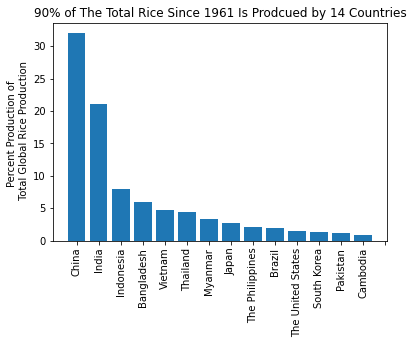

In [16]:
top_countries = ['China', 'India', 'Indonesia', 'Bangladesh', 'Vietnam', 'Thailand', 'Myanmar', 'Japan', 'The Philippines', 'Brazil', 'The United States', 'South Korea', 'Pakistan', 'Cambodia']
plt.bar(top_producers_90.index, top_producers_90['percent_production'])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13, 14], top_countries, rotation=90)
plt.ylabel('Percent Production of \n Total Global Rice Production')
plt.title('90% of The Total Rice Since 1961 Is Prodcued by 14 Countries')
plt.savefig('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/figures/top_producers.png', bbox_inches='tight', pad_inches=0.2);

In [17]:
# subset for only the countries mentioned above
top_90 = df[df['iso'].isin(['CHN', 'IND', 'IDN', 'BGD', 'VNM', 'THA', 'MMR', 'JPN', 'PHL', 'BRA', 'USA', 'KOR', 'PAK', 'KHM'])]

In [18]:
top_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826 entries, 0 to 14151
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       826 non-null    int64  
 1   iso                        826 non-null    object 
 2   country_or_area            826 non-null    object 
 3   region                     705 non-null    object 
 4   continent                  705 non-null    object 
 5   number_of_disasters        826 non-null    float64
 6   total_human_affected       826 non-null    float64
 7   temperature                728 non-null    float64
 8   precipitation              728 non-null    float64
 9   cropland                   826 non-null    float64
 10  country_area               826 non-null    float64
 11  cropland_pct               826 non-null    float64
 12  variant                    826 non-null    object 
 13  population                 826 non-null    float

In [19]:
# for right now, I will drop rows missing temperature and precipitation data
top_90 = top_90.dropna(subset=['temperature', 'precipitation'])

In [20]:
top_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 13055
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       728 non-null    int64  
 1   iso                        728 non-null    object 
 2   country_or_area            728 non-null    object 
 3   region                     610 non-null    object 
 4   continent                  610 non-null    object 
 5   number_of_disasters        728 non-null    float64
 6   total_human_affected       728 non-null    float64
 7   temperature                728 non-null    float64
 8   precipitation              728 non-null    float64
 9   cropland                   728 non-null    float64
 10  country_area               728 non-null    float64
 11  cropland_pct               728 non-null    float64
 12  variant                    728 non-null    object 
 13  population                 728 non-null    float

In [21]:
top_90[top_90['iso'] == 'KHM'].iloc[:2,]

,year,iso,country_or_area,region,continent,number_of_disasters,total_human_affected,temperature,precipitation,cropland,country_area,cropland_pct,variant,population,rice_production_in_tonnes
1398,1987,KHM,Cambodia,South-Eastern Asia,Asia,1.0,0.0,27.001324,153.39981,3100.0,18104.0,0.171233,Medium,8198.082,1210605.0
1758,1991,KHM,Cambodia,South-Eastern Asia,Asia,1.0,900100.0,27.498486,157.92879,3810.0,18104.0,0.210451,Medium,9289.299,1600800.0


In [22]:
# input missing regions
regions = {
    'CHN': 'Easter Asia', 'IND': 'Southern Asia', 'IDN': 'South-Eastern Asia', 
    'BGD': 'Southern Asia', 'VNM': 'South-Eastern Asia', 
    'THA': 'South-Eastern Asia', 'MMR': 'South-Eastern Asia', 
    'JPN': 'Eastern Asia', 'PHL': 'South-Eastern Asia', 'BRA': 'South America', 
    'USA': 'Northern America', 'KOR': 'Eastern Asia', 'PAK': 'Southern Asia', 
    'KHM': 'South-Eastern Asia'}
continents = {'CHN': 'Asia', 'IND': 'Asia', 'IDN': 'Asia', 'BGD': 'Asia', 
             'VNM': 'Asia', 'THA': 'Asia', 'MMR': 'Asia', 'JPN': 'Asia', 
             'PHL': 'Asia', 'BRA': 'Americas', 'USA': 'Americas', 
             'KOR': 'Asia', 'PAK': 'Asia', 'KHM': 'Asia'}
top_90['region'].fillna(top_90['iso'].map(regions), inplace=True)
top_90['continent'].fillna(top_90['iso'].map(continents), inplace=True)

In [23]:
top_90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 13055
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       728 non-null    int64  
 1   iso                        728 non-null    object 
 2   country_or_area            728 non-null    object 
 3   region                     728 non-null    object 
 4   continent                  728 non-null    object 
 5   number_of_disasters        728 non-null    float64
 6   total_human_affected       728 non-null    float64
 7   temperature                728 non-null    float64
 8   precipitation              728 non-null    float64
 9   cropland                   728 non-null    float64
 10  country_area               728 non-null    float64
 11  cropland_pct               728 non-null    float64
 12  variant                    728 non-null    object 
 13  population                 728 non-null    float

In [24]:
top_90.to_csv('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/data/global_data/top90.csv')

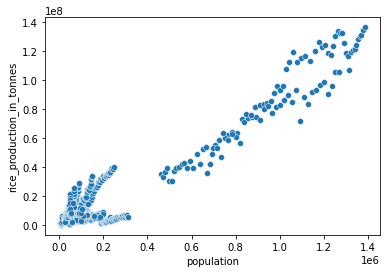

In [25]:
sns.scatterplot(x='population', y='rice_production_in_tonnes', data=top_90);

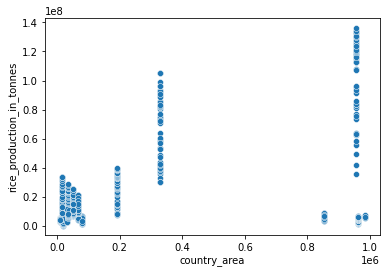

In [26]:
sns.scatterplot(x='country_area', y='rice_production_in_tonnes', data=top_90);

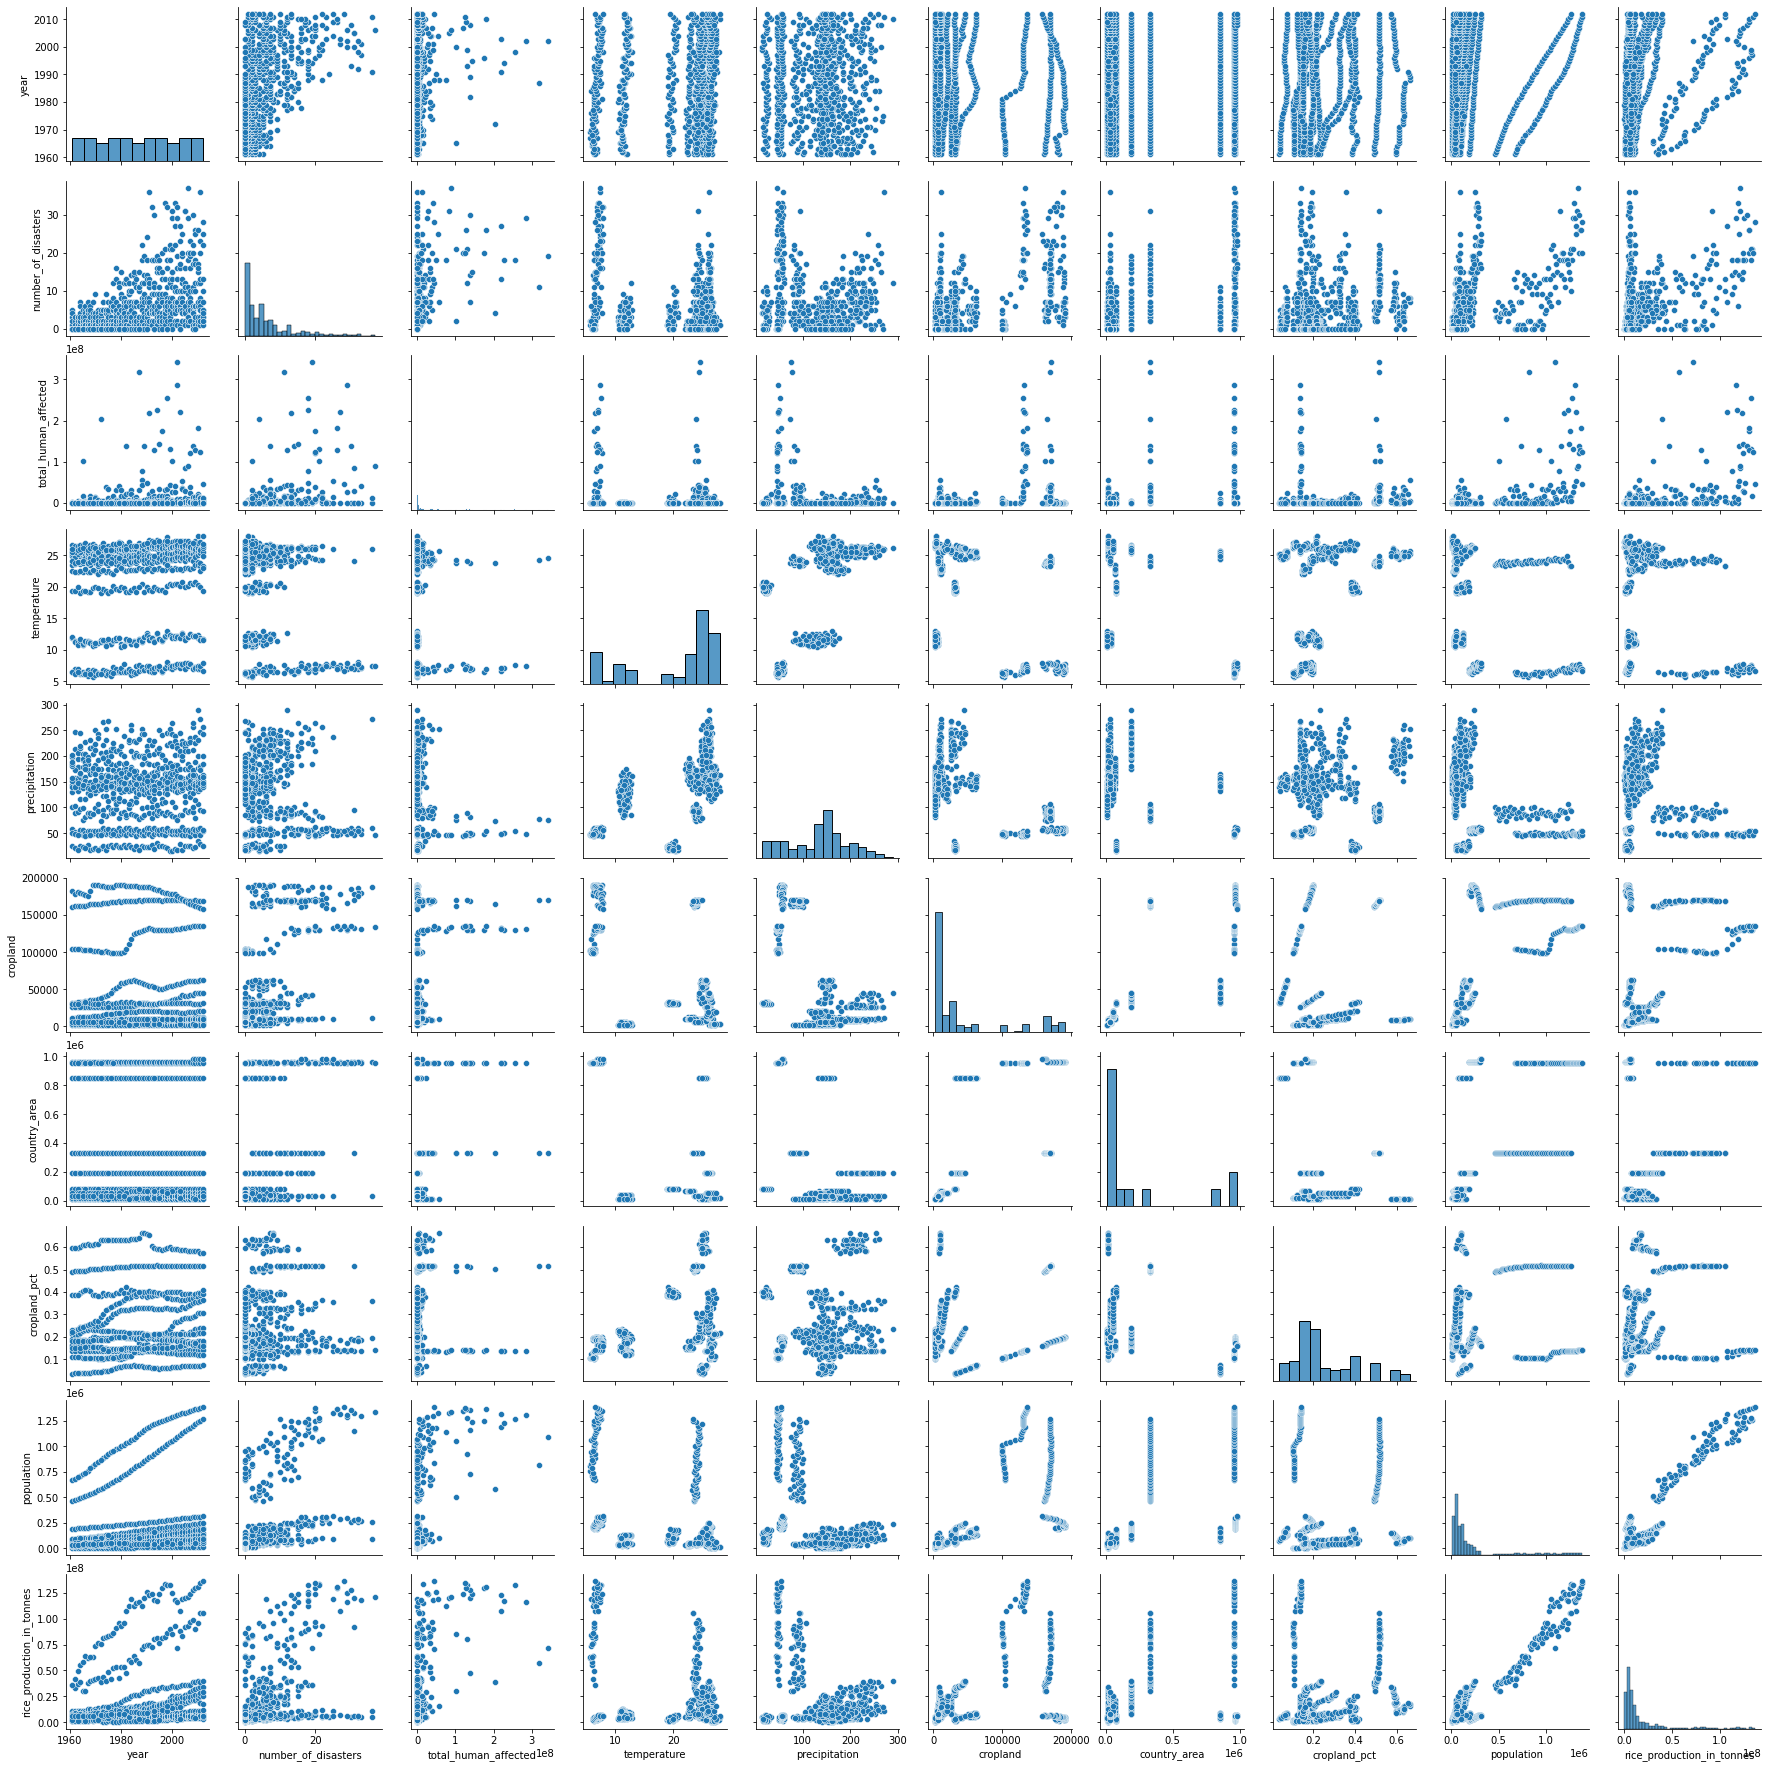

In [27]:
sns.pairplot(top_90);

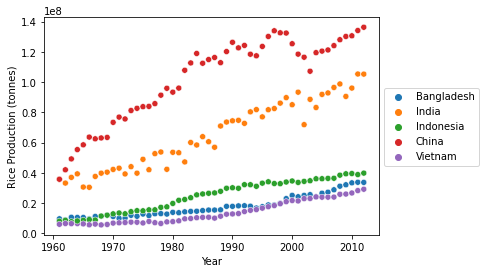

In [55]:
scatter = sns.scatterplot(x='year', y='rice_production_in_tonnes', data=top_90[top_90['iso'].isin(['CHN', 'IND', 'IDN', 'BGD', 'VNM'])], hue='iso')
legend_labels, _= scatter.get_legend_handles_labels()
scatter.legend(legend_labels, ['Bangladesh', 'India', 'Indonesia', 'China', 'Vietnam'], fontsize = 10,
               bbox_to_anchor= (1, 0.7))
scatter.set_xlabel('Year')
scatter.set_ylabel('Rice Production (tonnes)')
plt.savefig('/content/drive/MyDrive/DS4A-W_Team25/Colab_Files/figures/top_5_over_time.png', bbox_inches='tight');

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = top_90[['year', 'number_of_disasters', 'total_human_affected', 'temperature', 'precipitation', 'cropland', 'country_area', 'population']]
y = top_90['rice_production_in_tonnes']

In [ ]:
X.shape, y.shape

((728, 8), (728,))

In [ ]:
# throw all numberical values to a linear model to see which features affect rice production
lm = sm.OLS(y, X).fit()

In [ ]:
print(lm.summary())

                                    OLS Regression Results                                    
Dep. Variable:     rice_production_in_tonnes   R-squared (uncentered):                   0.971
Model:                                   OLS   Adj. R-squared (uncentered):              0.971
Method:                        Least Squares   F-statistic:                              3035.
Date:                       Wed, 20 Oct 2021   Prob (F-statistic):                        0.00
Time:                               21:51:17   Log-Likelihood:                         -12401.
No. Observations:                        728   AIC:                                  2.482e+04
Df Residuals:                            720   BIC:                                  2.485e+04
Df Model:                                  8                                                  
Covariance Type:                   nonrobust                                                  
                           coef    std err        

Precipitation and year a big factor here in affecting rice production, but that doesn't address whether change in precipitation is affecting rice production. Here, it's only indicating that countries with wetter environments are better rice producers.

In [ ]:
# need to implement `delta_temp`  and `delta_ppt` which take the change from previous year
top_90['delta_temp'] = top_90['temperature'].diff(periods=-1)
top_90['delta_ppt'] = top_90['precipitation'].diff(periods=-1)
new_top_90 = top_90.dropna()

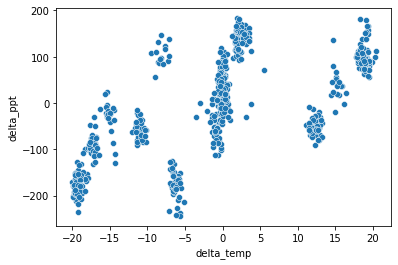

In [ ]:
sns.scatterplot(x='delta_temp', y='delta_ppt', data=new_top_90);

In [ ]:
# effect of change in temp and ppt to rice production
X = new_top_90[['delta_temp', 'delta_ppt']]
y = new_top_90['rice_production_in_tonnes']
lm = sm.OLS(y, X).fit()

In [ ]:
print(lm.summary())

                                    OLS Regression Results                                    
Dep. Variable:     rice_production_in_tonnes   R-squared (uncentered):                   0.081
Model:                                   OLS   Adj. R-squared (uncentered):              0.079
Method:                        Least Squares   F-statistic:                              32.05
Date:                       Wed, 20 Oct 2021   Prob (F-statistic):                    4.58e-14
Time:                               21:51:17   Log-Likelihood:                         -13643.
No. Observations:                        727   AIC:                                  2.729e+04
Df Residuals:                            725   BIC:                                  2.730e+04
Df Model:                                  2                                                  
Covariance Type:                   nonrobust                                                  
                 coef    std err          t      P

In [ ]:
X = top_90[['year', 'number_of_disasters', 'temperature', 'precipitation', 'cropland']]
y= top_90['rice_production_in_tonnes']

In [ ]:
lg = LinearRegression()
lg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lg.score(X, y)

0.3475937676156726

In [ ]:
coefs = lg.coef_

In [ ]:
preds = lg.predict(X)

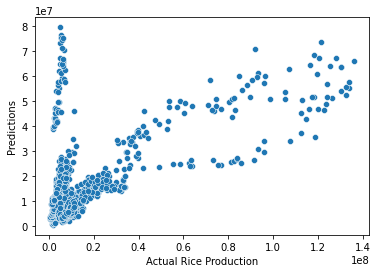

In [ ]:
sns.scatterplot(x=y, y=preds)
plt.xlabel('Actual Rice Production')
plt.ylabel('Predictions');

In [ ]:
X = top_90[['number_of_disasters', 'temperature', 'precipitation', 'cropland']]
y= top_90['rice_production_in_tonnes']

Following the instructions on this blog (https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8) for panel analysis. 